## 라이브러리 호출

In [1]:
!pip install openpyxl

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

## 19~22년 구별 가로등 수

In [2]:
lamp_df = pd.read_excel('C:/Users/kjwon/OneDrive/바탕 화면/D&A/서울시_자치구별_가로등수.xlsx')

# 전처리
lamp_df = lamp_df.set_index('자치구별(2)')  # 인덱스 설정
lamp_df = lamp_df.drop(labels=lamp_df.columns[:5], axis=1)  # target연도 외의 데이터 처리
lamp_df = lamp_df.drop(labels=lamp_df.columns[-1], axis=1)
lamp_df = lamp_df.drop(labels=lamp_df.index[:11])
lamp_df = lamp_df.rename_axis(mapper='자치구',axis=0)  # 축 설명
lamp_df = lamp_df.rename_axis(mapper='가로등수',axis=1)
lamp_df = lamp_df.sort_index()  # 가나다순 정렬
lamp_df.info()  # 결측값, 데이터타입 확인
lamp_df = lamp_df.astype(int)
lamp_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2019    25 non-null     object
 1   2020    25 non-null     object
 2   2021    25 non-null     object
 3   2022    25 non-null     object
dtypes: object(4)
memory usage: 1000.0+ bytes


C:\Users\kjwon\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


가로등수,2019,2020,2021,2022
자치구,,,,
강남구,13788,14326,14351,14351
강동구,7477,7952,8126,8126
강북구,4339,4301,4308,4308
강서구,8919,9552,9994,9994
관악구,5304,5588,5789,5789


## 구별 누적설치수 시각화

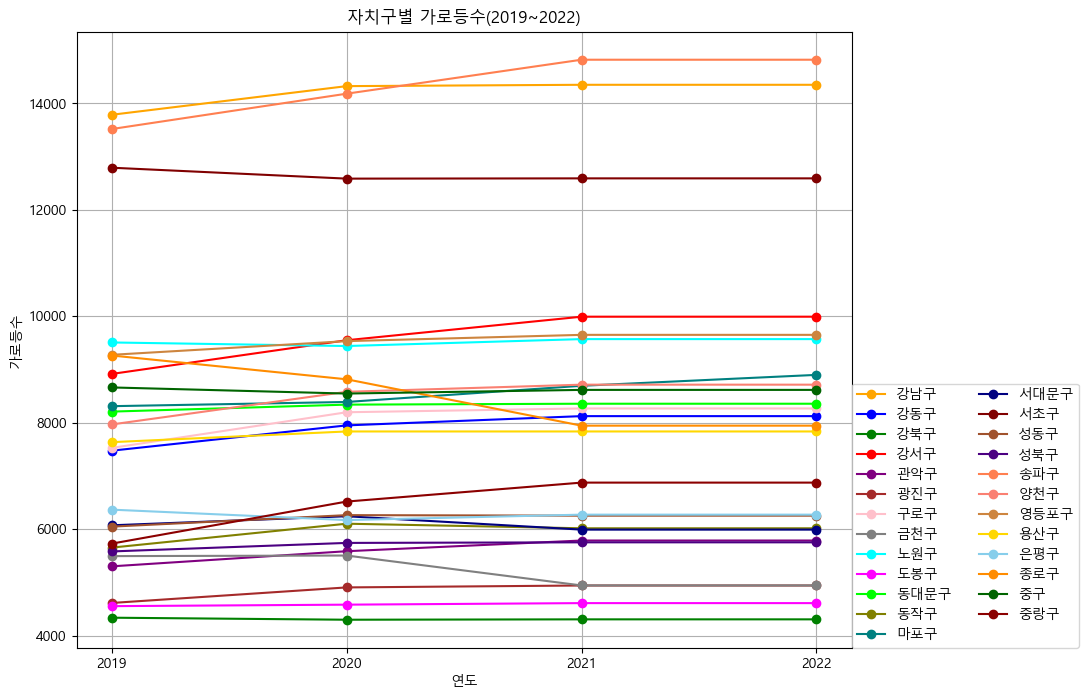

In [3]:
colors = ['orange', 'blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta',
          'lime', 'olive', 'teal', 'navy', 'maroon', 'sienna', 'indigo', 'coral', 'salmon',
          'peru', 'gold', 'skyblue', 'darkorange', 'darkgreen', 'darkred']
color_index = 0

plt.figure(figsize=(10, 8))
for index, row in lamp_df.iterrows():
    plt.plot(lamp_df.columns, row, marker='o', label=index, color=colors[color_index])
    color_index += 1

plt.title('자치구별 가로등수(2019~2022)')
plt.xlabel('연도')
plt.ylabel('가로등수')
plt.legend(loc=(1,0), ncol=2)
plt.grid(True)

# 이미지 저장
plt.savefig('자치구별 가로등수(2019~2022)', bbox_inches='tight')  # bbox_inches='tight'로 설정하여 라벨이 잘리지 않도록 함
plt.show()


## 19년~22년 대비 변화량 시각화

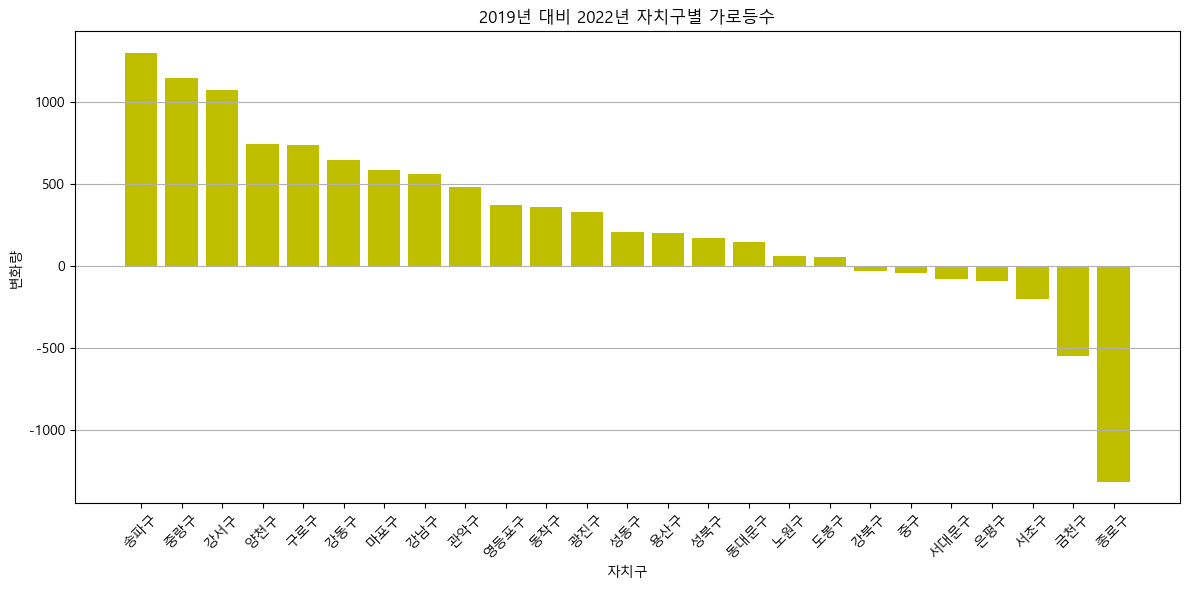

In [8]:
def delta_graph(df):
    df['변화량'] = (df['2022'] - df['2019'])

    df_sorted = df.sort_values(by='변화량', ascending=False)

    plt.figure(figsize=(12, 6))
    plt.bar(df_sorted.index, df_sorted['변화량'], color='y')
    plt.title('2019년 대비 2022년 자치구별 가로등수')
    plt.xlabel('자치구')
    plt.ylabel('변화량')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.tight_layout()

delta_graph(lamp_df)

# 이미지 저장 bbox_inches='tight'
plt.savefig('2019년 대비 2022년 자치구별 가로등수')  # bbox_inches='tight'로 설정하여 라벨이 잘리지 않도록 함
plt.show()

## 6개구 연도별 가로등 수 시각화

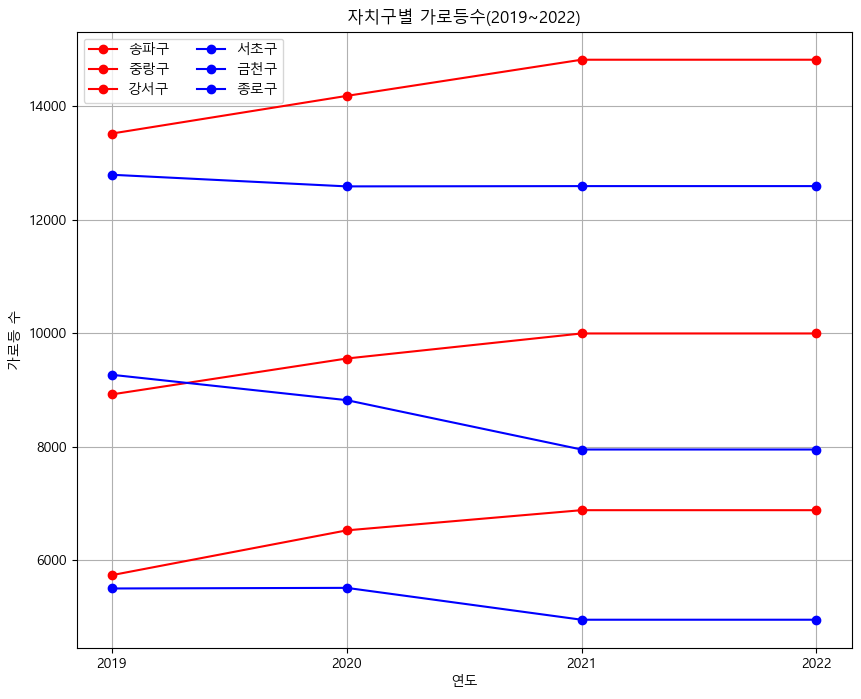

In [4]:
target_lamp_df = lamp_df.loc[['송파구', '중랑구', '강서구', '서초구', '금천구', '종로구']]

colors = ['red', 'red', 'red', 'blue', 'blue', 'blue']
color_index = 0
# 그래프 사이즈 설정
plt.figure(figsize=(10, 8))

# DF의 인덱스와 값으로 라인그래프
for index, row in target_lamp_df.iterrows():
    plt.plot(target_lamp_df.columns, row, marker='o', label=index, color=colors[color_index])
    color_index += 1

plt.title('자치구별 가로등수(2019~2022)')
plt.xlabel('연도')
plt.ylabel('가로등 수')
plt.legend(loc='best', ncol=2)
plt.grid(True)

# 이미지 저장
plt.savefig('자치구별 가로등수(2019~2022)', bbox_inches='tight')  # bbox_inches='tight'로 설정하여 라벨이 잘리지 않도록 함
plt.show()

## 19년~22년 전년대비 변화율 증감비 시각화

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2015    25 non-null     object
 1   2016    25 non-null     object
 2   2017    25 non-null     object
 3   2018    25 non-null     object
 4   2019    25 non-null     object
 5   2020    25 non-null     object
 6   2021    25 non-null     object
 7   2022    25 non-null     object
dtypes: object(8)
memory usage: 1.8+ KB


C:\Users\kjwon\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,2019,2020,2021,2022
자치구,,,,
강남구,0.000000,-2.853519,3.901944,0.174508
강동구,1.153213,-6.326735,6.352815,2.188129
강북구,1.799775,-4.110497,-0.875778,0.162753
강서구,-0.134509,33.478001,7.097208,4.627303
관악구,-0.020429,8.377605,5.354449,3.596994


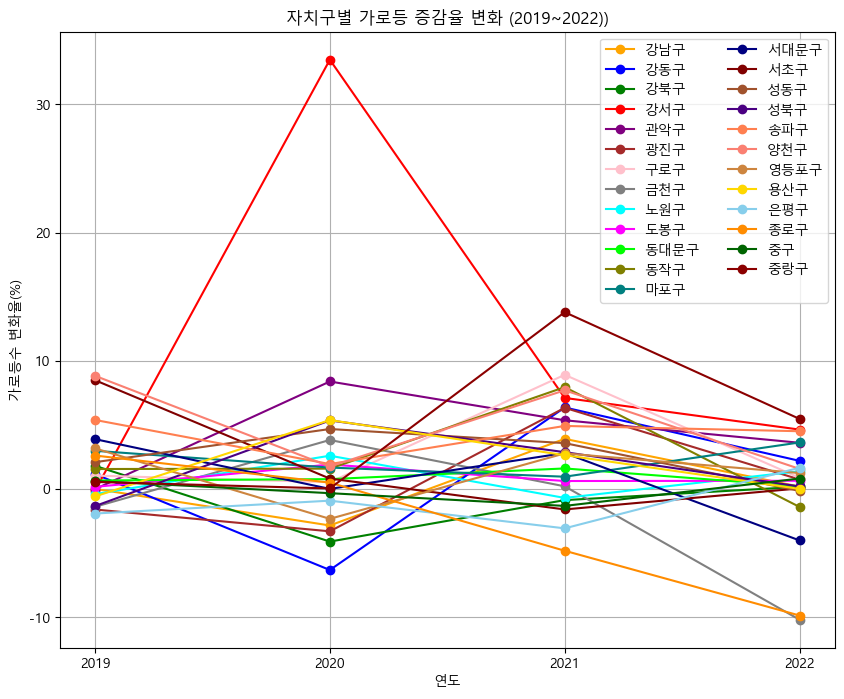

In [10]:
lamp_df = pd.read_excel('C:/Users/kjwon/OneDrive/바탕 화면/D&A/서울시_자치구별_가로등수.xlsx')

# 전처리
lamp_df = lamp_df.set_index('자치구별(2)')  # 인덱스 설정
lamp_df = lamp_df.drop(labels=lamp_df.columns[:1], axis=1)  # target연도 외의 데이터 처리
lamp_df = lamp_df.drop(labels=lamp_df.columns[-1], axis=1)
lamp_df = lamp_df.drop(labels=lamp_df.index[:11])
lamp_df = lamp_df.rename_axis(mapper='자치구',axis=0)  # 축 설명
lamp_df = lamp_df.rename_axis(mapper='가로등수',axis=1)
lamp_df = lamp_df.sort_index()  # 가나다순 정렬
lamp_df.info()  # 결측값, 데이터타입 확인
lamp_df = lamp_df.astype(int)
lamp_df.head()

# 전년대비 변화율 구하는 함수
def delta_lamp(x):
    last_year = list(lamp_df.columns).index(x)-1
    return np.array(lamp_df[x])/np.array(lamp_df.iloc[:,last_year]) -1 


# 19년~23년 변화율(%) DF
delta_lamp_df = pd.DataFrame(index=lamp_df.index)
for i in lamp_df.columns[3:-1]:
    delta_lamp_df[i] = delta_lamp(i)

delta_lamp_df = delta_lamp_df.applymap(lambda x : x*100)
delta_lamp_df.columns = ['2019','2020', '2021', '2022']
display(delta_lamp_df.head())


colors = ['orange', 'blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta',
          'lime', 'olive', 'teal', 'navy', 'maroon', 'sienna', 'indigo', 'coral', 'salmon',
          'peru', 'gold', 'skyblue', 'darkorange', 'darkgreen', 'darkred']
color_index = 0
# 그래프 사이즈 설정
plt.figure(figsize=(10, 8))

# DF의 인덱스와 값으로 라인그래프
for index, row in delta_lamp_df.iterrows():
    plt.plot(delta_lamp_df.columns, row, marker='o', label=index, color=colors[color_index])
    color_index += 1

plt.title('자치구별 가로등 증감율 변화 (2019~2022))')
plt.xlabel('연도')
plt.ylabel('가로등수 변화율(%)')
plt.legend(loc='best', ncol=2)
plt.grid(True)

# 이미지 저장
plt.savefig('자치구별 가로등수 증감율 변화 (2019~2022)', bbox_inches='tight')  # bbox_inches='tight'로 설정하여 라벨이 잘리지 않도록 함
plt.show()

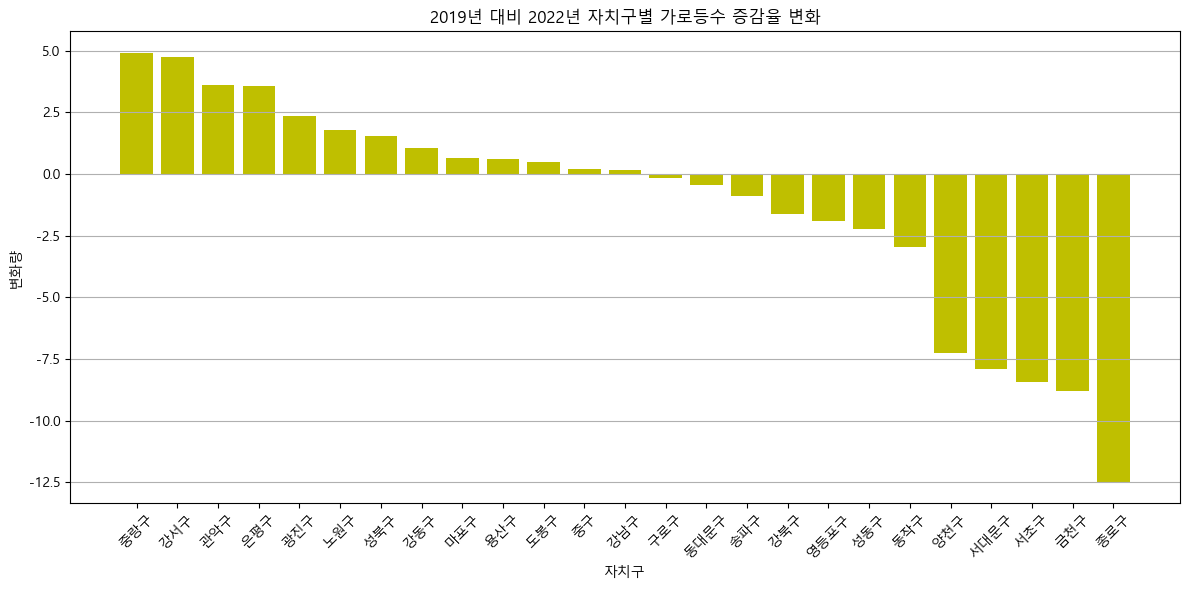

In [12]:
def delta_graph(df):
    df['변화량'] = (df['2022'] - df['2019'])

    df_sorted = df.sort_values(by='변화량', ascending=False)

    plt.figure(figsize=(12, 6))
    plt.bar(df_sorted.index, df_sorted['변화량'], color='y')
    plt.title('2019년 대비 2022년 자치구별 가로등수 증감율 변화')
    plt.xlabel('자치구')
    plt.ylabel('변화량')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.tight_layout()
   
    df.drop(['변화량'], axis=1, inplace=True)

delta_graph(delta_lamp_df)

# 이미지 저장
plt.savefig('2019년 대비 2022년 자치구별 가로등수 증감율 변화', bbox_inches='tight')  # bbox_inches='tight'로 설정하여 라벨이 잘리지 않도록 함
plt.show()

## 19~22년 6개구 전년대비 변화율 증감비 시각화

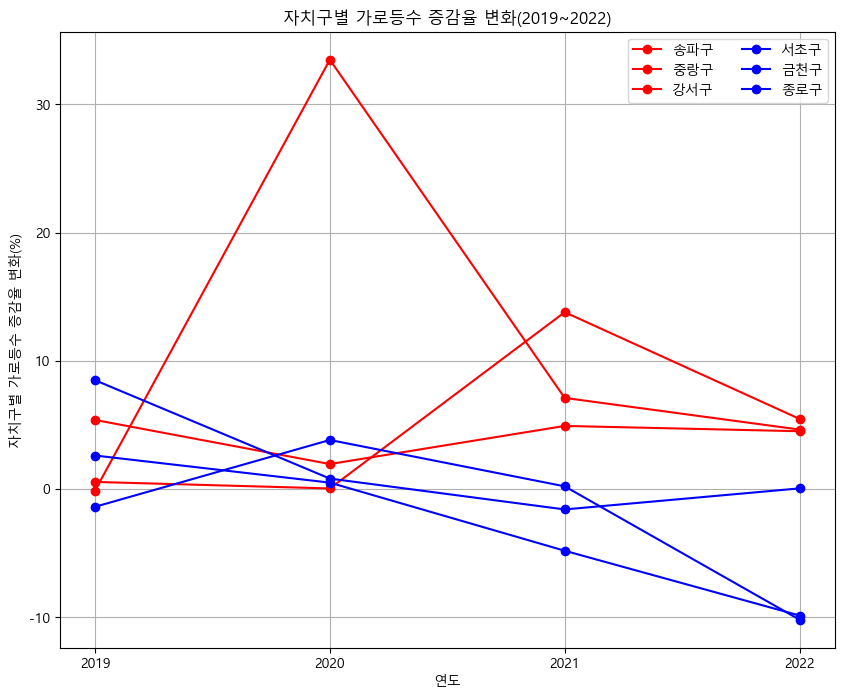

In [13]:
target_delta_lamp_df = delta_lamp_df.loc[['송파구', '중랑구', '강서구', '서초구', '금천구', '종로구']]
colors = ['red', 'red', 'red', 'blue', 'blue', 'blue']
color_index = 0
# 그래프 사이즈 설정
plt.figure(figsize=(10, 8))
for index, row in target_delta_lamp_df.iterrows():
    plt.plot(target_delta_lamp_df.columns, row, marker='o', label=index, color=colors[color_index])
    color_index += 1

plt.title('자치구별 가로등수 증감율 변화(2019~2022)')
plt.xlabel('연도')
plt.ylabel('자치구별 가로등수 증감율 변화(%)')
plt.legend(loc='best', ncol=2)
plt.grid(True)

# 이미지 저장
plt.savefig('자치구별 가로등수 증감율 변화(2019~2022)', bbox_inches='tight')  # bbox_inches='tight'로 설정하여 라벨이 잘리지 않도록 함
plt.show()